In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.optimize
from scipy.optimize import curve_fit


In [8]:
a = np.loadtxt('ASTR19_S22_group_project_data.txt', dtype='str')
i=0

datetemp=[]
timetemp=[]
time=[]
height=[]
date=[]

for arr in a: #fix this part
	datetemp.append(int(arr[0]))
	timetemp.append(arr[1])
	height.append(float(arr[2]))

for elem in timetemp:
	splitelem=elem.split(':')
	abstime = (int(splitelem[0])*60+int(splitelem[1]))
	time.append(abstime)


for elem in time:
	date.append(float(datetemp[i]+elem/1440))
	i+=1

#LOADS ALL DATA ^^^^ AND CREATES LISTS date[] x axis AND height[] (y axis)

heighterr=0.25 #sets uncertainty error

[  0.95481479   1.98152407  -6.50939754 -14.13565923   0.17262956
  10.19346572   2.59239566   8.1058861   11.97524742]
143952.30922024944


array([2.10804698e-01, 1.94905190e+00, 6.62552624e-04, 3.97973730e-01,
       1.44291054e-01, 3.40035544e-02, 3.80432713e-01, 2.01856576e+01,
       4.75807645e-01])

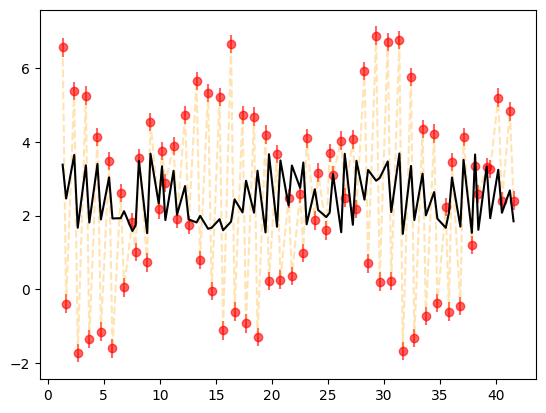

In [9]:
def fittedcurve(x,a,b,c,d,e,f,g,h,i):
    #return (a*np.sin((2*np.pi/b)*x+c))*((d*np.sin((2*np.pi/e)*x))+(g*np.sin((2*np.pi/h)*x+i))) + j #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    #  return a*np.sin(b*x+c)*np.sin(d*x+e) + f*np.sin(g*x+h) +i
    
    return a*np.sin(b*np.sin(c*x+d)+i) + e*np.sin(f*x+h)+g #best one so far ++++++++++++++++++++++++++++++++++++++++++++
    

#return (a*np.cos(b*x))*(np.sin(d*x)) + (e*np.sin(f*x))+g
    #return np.sin(np.sin(a*x)*x+c)+np.sin(b*x)+d
#   return h*np.cos(a*x)*np.sin(b*x+c)+d*np.cos(e*x+f)+g
    # return b*np.cos(c*x+d)*e*np.sin(f*x+g)+h*np.sin(i*x+j)+k
   # return a*(b*(c*np.sin(d*np.cos(e*x+f)*x+g)+h*np.sin(i*x+j))+k)+l
#maxfev=2170000000,p0=[9.00001,-2,10,10,10,10,10,10,10,10],method='trf',bounds=(-100,400)

date=np.array(date)
height=np.array(height)
#maxfev=2170000000,p0=[9.00001,-2,10,10,10,10,10,10,10,10],method='trf',bounds=(-100,400)
params,cov = curve_fit(fittedcurve,date,height,maxfev=2170000000,p0=[9.00001,-2,10,10,10,10,10,10,10],method='trf',bounds=(-100,400)) #++++++++++++++++++++++++++++++++++++++=


#params, cov = curve_fit(fittedcurve,date,height,maxfev=99999,p0=[4,-2,1,4,1,1,1,1,1],method='trf',bounds=(-100,400)) #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

print(params)


fit = fittedcurve(date,*params) #*params unpacks the params[] list generated by curve_fit()
plt.errorbar(date,height,yerr=heighterr,color='red',alpha=0.6,fmt='o')
plt.plot(date,fit,color='black',zorder=3)
plt.plot(date,height,color='orange',linestyle='dashed',alpha=0.3)

fitstd=np.std(fit)
print(np.linalg.cond(cov))
np.diag(cov)

#create axes and figure instead of doing it this way, work on plot styling^^^


In [10]:
print(date[0:10])


[1.33819444 1.65069444 2.37152778 2.68402778 3.40625    3.71805556
 4.44097222 4.75       5.47777778 5.78194444]


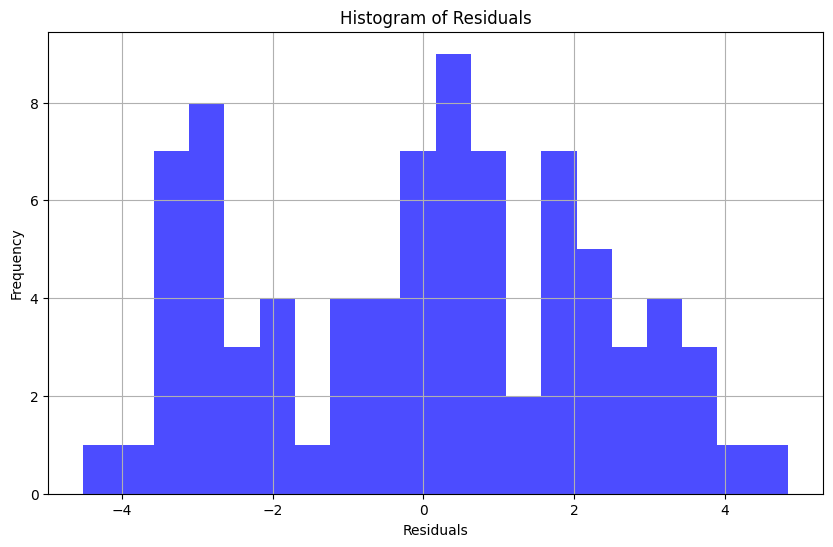

Standard Deviation of Residuals: 2.265116868240823
Intrinsic Scatter: 2.251278398330405


In [11]:
residuals = height - fit

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate standard deviation of residuals
residual_std = np.std(residuals)
print(f"Standard Deviation of Residuals: {residual_std}")

intrinsic_scatter = np.sqrt(residual_std**2 - heighterr**2)

print(f"Intrinsic Scatter: {intrinsic_scatter}")
